In [12]:
#importing libraries
import pandas as pd
import pandas_datareader as pdr
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import numpy as np


In [3]:
#gathering stock data of samsung electronics (samsung) from yahoo finance
df_samsung = pdr.get_data_yahoo("SMSN.IL")

In [9]:
#printing all the columns
df_samsung.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
#plotting all the indicators except volume
fig_all = px.line(df_samsung, y= ['High', 'Low', 'Open', 'Close', 'Adj Close'], title='Closing price of Samsung Electronics')
fig_all.show()

In [14]:
#plotting volume of samsung shares traded
fig_vol= px.line(df_samsung, y="Volume", title="Volume of Samsung Shares Traded")
fig_vol.show()

In [7]:
#descriptive statistics of samsung close price
df_samsung["Close"].describe()

count    1263.000000
mean     1257.949388
std       294.846368
min       837.000000
25%      1025.000000
50%      1168.000000
75%      1484.000000
max      2064.000000
Name: Close, dtype: float64

In [16]:
#boxplot of samsung close price
fig_box = px.box(df_samsung,y="Close", title="Boxplot of Samsung Close Price")
fig_box.show()

In [4]:
#plotting closing price of samsung
fig_close = px.line(df_samsung, y="Close", title="Closing price of Samsung")
fig_close.show()

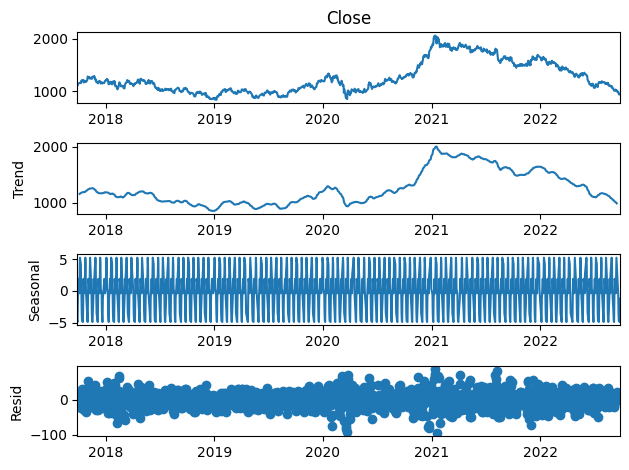

In [24]:
#time series decomposition of close price
dec_result = seasonal_decompose(df_samsung["Close"], model='additive', period = 12)
dec_result.plot()
pyplot.show()


In [37]:
#splitting data into train and test
close = df_samsung["Close"]
train, test= np.split(close, [int(.83 *len(close))])


In [38]:
#checking train-test split percentage
(len(test))/(len(train))


0.20515267175572519